In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Ostring_Abgang1_01012016.csv',sep=';',decimal=',')

In [10]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['No.', 'Date', 'Time', 'U-L1/N', 'Unit', 'U-L2/N', 'Unit.1', 'U-L3/N', 'Unit.2', 'I-L1', 'Unit.3', 'I-L2', 'Unit.4', 'I-L3', 'Unit.5', 'Pges', 'Unit.6', 'Sges', 'Unit.7', 'CosPhi', 'Unit.8', 'W-Lieferung', 'Unit.9', 'W-Bezug', 'Unit.10', 'Unnamed: 25']


In [11]:
df.head()


,No.,Date,Time,U-L1/N,Unit,U-L2/N,Unit.1,U-L3/N,Unit.2,I-L1,...,Unit.6,Sges,Unit.7,CosPhi,Unit.8,W-Lieferung,Unit.9,W-Bezug,Unit.10,Unnamed: 25
0,1,01.01.2016,00:00:00,239.07,V,238.61,V,238.94,V,2.34,...,W,1128.81,VA,0.69,,0,Wh,2247840.00,Wh,NaN
1,2,01.01.2016,00:00:01,239.07,V,238.61,V,238.94,V,2.34,...,W,1128.81,VA,0.69,,0,Wh,2247840.00,Wh,NaN
2,3,01.01.2016,00:00:02,239.07,V,238.61,V,238.94,V,2.34,...,W,1128.81,VA,0.69,,0,Wh,2247840.00,Wh,NaN
3,4,01.01.2016,00:00:03,239.16,V,238.59,V,238.96,V,2.26,...,W,1114.55,VA,0.70,,0,Wh,2247840.00,Wh,NaN
4,5,01.01.2016,00:00:04,239.16,V,238.59,V,238.96,V,2.26,...,W,1114.55,VA,0.70,,0,Wh,2247842.08,Wh,NaN


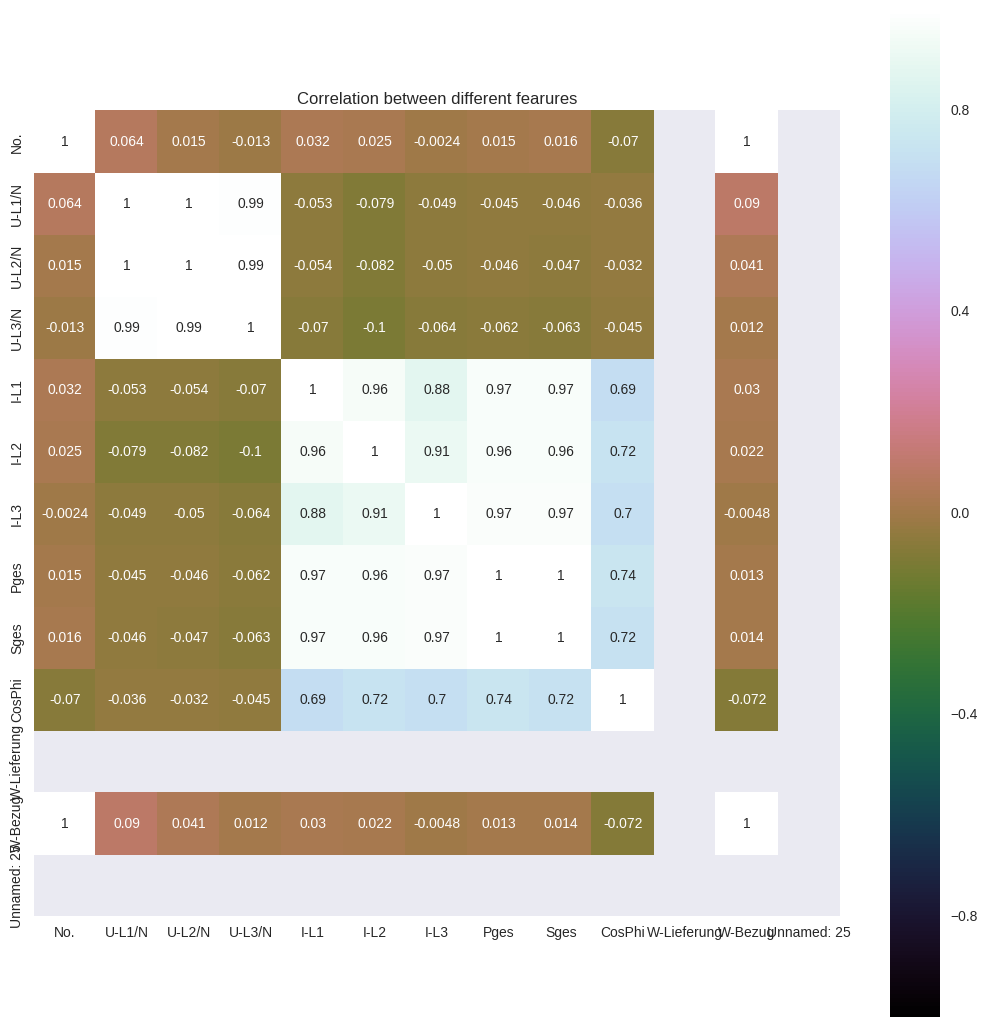

In [59]:
correlation = df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
fig = plt.figure() 
fig.savefig('Correlation between different feature before dimensionality reduction of Ostring_Abgang1_01012016.png')

# PCA implementation


In [16]:
df_drop = df.drop(labels=['No.', 'Date', 'Time', 'Unit', 'Unit.1', 'Unit.2', 'Unit.3', 'Unit.4', 'Unit.5', 'Unit.6', 'Unit.7', 'Unit.8', 'Unit.9', 'Unit.10','W-Lieferung', 'Unnamed: 25'],axis=1)

In [30]:
df_drop['Ages'] = df_drop['Sges'] * df_drop['CosPhi']

In [31]:
df_drop.head()

,U-L1/N,U-L2/N,U-L3/N,I-L1,I-L2,I-L3,Pges,Sges,CosPhi,W-Bezug,Ages
0,239.07,238.61,238.94,2.34,0.45,1.94,871.33,1128.81,0.69,2247840.00,778.8789
1,239.07,238.61,238.94,2.34,0.45,1.94,871.33,1128.81,0.69,2247840.00,778.8789
2,239.07,238.61,238.94,2.34,0.45,1.94,871.33,1128.81,0.69,2247840.00,778.8789
3,239.16,238.59,238.96,2.26,0.48,1.94,871.54,1114.55,0.70,2247840.00,780.1850
4,239.16,238.59,238.96,2.26,0.48,1.94,871.54,1114.55,0.70,2247842.08,780.1850


In [32]:
X = df_drop.iloc[:,0:6].values
Y = df_drop.iloc[:,6].values
X

array([[ 239.07,  238.61,  238.94,    2.34,    0.45,    1.94],
       [ 239.07,  238.61,  238.94,    2.34,    0.45,    1.94],
       [ 239.07,  238.61,  238.94,    2.34,    0.45,    1.94],
       ..., 
       [ 240.22,  239.5 ,  239.72,    2.46,    0.44,    1.56],
       [ 240.22,  239.5 ,  239.72,    2.46,    0.44,    1.56],
       [ 240.22,  239.5 ,  239.72,    2.46,    0.44,    1.56]])

In [33]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [34]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00001157  0.99634365  0.99216372 -0.05276058 -0.07932007 -0.04872037]
 [ 0.99634365  1.00001157  0.99440972 -0.05430501 -0.08154884 -0.04994673]
 [ 0.99216372  0.99440972  1.00001157 -0.0697827  -0.10028088 -0.06426616]
 [-0.05276058 -0.05430501 -0.0697827   1.00001157  0.95581861  0.87900652]
 [-0.07932007 -0.08154884 -0.10028088  0.95581861  1.00001157  0.90773106]
 [-0.04872037 -0.04994673 -0.06426616  0.87900652  0.90773106  1.00001157]]


In [35]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00001157  0.99634365  0.99216372 -0.05276058 -0.07932007 -0.04872037]
 [ 0.99634365  1.00001157  0.99440972 -0.05430501 -0.08154884 -0.04994673]
 [ 0.99216372  0.99440972  1.00001157 -0.0697827  -0.10028088 -0.06426616]
 [-0.05276058 -0.05430501 -0.0697827   1.00001157  0.95581861  0.87900652]
 [-0.07932007 -0.08154884 -0.10028088  0.95581861  1.00001157  0.90773106]
 [-0.04872037 -0.04994673 -0.06426616  0.87900652  0.90773106  1.00001157]]


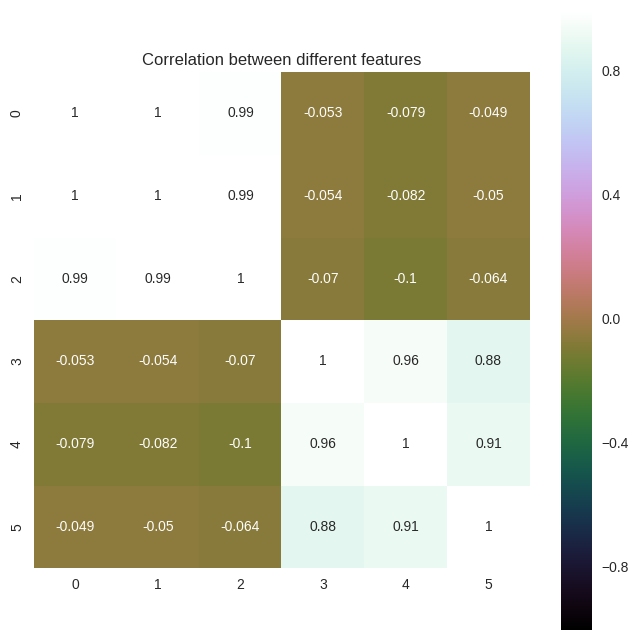

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')
fig = plt.figure() 
fig.savefig('Correlation between different feature of Ostring_Abgang1_01012016.png')

In [37]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.47588564  0.32725587  0.00991148 -0.5571169   0.59489847 -0.04532976]
 [ 0.47675432  0.32663235  0.00658097  0.79518263  0.18144764 -0.0271046 ]
 [ 0.48117052  0.31749193 -0.00595652 -0.23922868 -0.77965772  0.05041626]
 [-0.32094202  0.48208213  0.53113884  0.00351517  0.03303981  0.61756019]
 [-0.3369444   0.47693576  0.25898919 -0.00782025 -0.06289053 -0.76675223]
 [-0.31333336  0.47491356 -0.80662204  0.0012123   0.01611069  0.15930844]]

Eigenvalues 
[ 3.12517833  2.69299439  0.13028795  0.00327837  0.00773548  0.04059491]


# PCA in scikit-learn

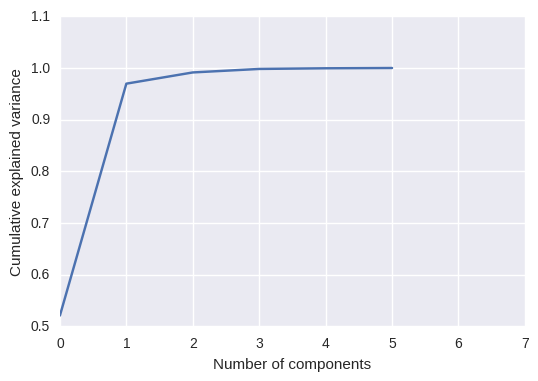

In [56]:
from sklearn.decomposition import PCA  #to decide number of components for PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
fig = plt.figure() 
fig.savefig('Components_vs_variance_Ostring_Abgang1_01012016.png')

In [47]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [48]:
print(Y_sklearn)

[[-1.74173026  0.58185728  0.03829275 -0.05360691 -0.15738059  0.04201061]
 [-1.74173026  0.58185728  0.03829275 -0.05360691 -0.15738059  0.04201061]
 [-1.74173026  0.58185728  0.03829275 -0.05360691 -0.15738059  0.04201061]
 ..., 
 [-2.59330214  1.06034504 -0.09432638 -0.02980493 -0.01069405  0.10911219]
 [-2.59330214  1.06034504 -0.09432638 -0.02980493 -0.01069405  0.10911219]
 [-2.59330214  1.06034504 -0.09432638 -0.02980493 -0.01069405  0.10911219]]


In [49]:
Y_sklearn.shape

(86400, 6)

In [50]:
n_components = pd.DataFrame(Y_sklearn, columns=('U-L1/N', 'U-L2/N', 'U-L3/N', 'I-L1', 'I-L2', 'I-L3'))
n_components.head()

,U-L1/N,U-L2/N,U-L3/N,I-L1,I-L2,I-L3
0,-1.741730,0.581857,0.038293,-0.053607,-0.157381,0.042011
1,-1.741730,0.581857,0.038293,-0.053607,-0.157381,0.042011
2,-1.741730,0.581857,0.038293,-0.053607,-0.157381,0.042011
3,-1.725484,0.657587,0.014713,-0.192582,-0.147586,0.085685
4,-1.725484,0.657587,0.014713,-0.192582,-0.147586,0.085685


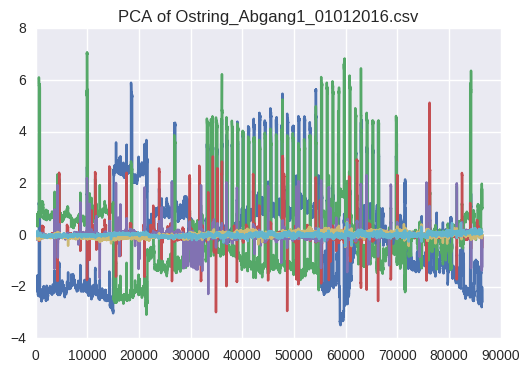

In [55]:
plt.plot(n_components)
plt.title("PCA of Ostring_Abgang1_01012016.csv")
fig = plt.figure() 
fig.savefig('PCA of Ostring_Abgang1_01012016.png')